In [32]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [72]:
raw_data = pd.read_csv('../data/preprocessed_data/processed_data.csv')
raw_data

,Accident_Index,Accident_Severity,Date,Day_of_Week,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,geometry,Area
0,2009440538664,Slight,2009-12-15,Tuesday,Not at junction or within 20 metres,50.855865,Darkness - lights lit,Fareham,-1.244857,2,2,Wet or damp,Dual carriageway,40.0,19:23,Urban,Fine no high winds,2009,POINT (-1.244857 50.855865),PO14
1,201297KB01203,Slight,2012-03-11,Sunday,Not at junction or within 20 metres,55.812451,Darkness - no lighting,Renfrewshire,-4.504165,1,1,Wet or damp,Single carriageway,60.0,06:40,Rural,Fine no high winds,2012,POINT (-4.504165 55.812451),PA5
2,201301CW10524,Slight,2013-05-11,Saturday,T or staggered junction,51.505776,Daylight,Westminster,-0.130853,2,2,Dry,Single carriageway,30.0,17:19,Urban,Fine no high winds,2013,POINT (-0.130853 51.505776),SW1Y
3,2007217008414,Slight,2007-02-23,Friday,Private drive or entrance,52.788414,Daylight,Stafford,-2.365930,1,2,Dry,Single carriageway,30.0,12:54,Rural,Fine no high winds,2007,POINT (-2.36593 52.788414),TF10
4,200836T080194,Slight,2008-10-10,Friday,Not at junction or within 20 metres,52.576906,Darkness - lights lit,Great Yarmouth,1.722393,1,1,Dry,Single carriageway,20.0,18:30,Urban,Fine no high winds,2008,POINT (1.722393 52.576906),NR31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047076,200606C056041,Slight,2006-08-25,Friday,Other junction,53.400959,Darkness - lights lit,Manchester,-2.294909,1,2,Dry,Single carriageway,40.0,21:50,Urban,Unknown,2006,POINT (-2.294909 53.400959),M23
2047077,2012620214195,Slight,2012-01-16,Monday,Roundabout,51.507229,Darkness - lights lit,Cardiff,-3.184096,1,2,Dry,Roundabout,30.0,17:00,Urban,Fine no high winds,2012,POINT (-3.184096 51.507229),CF14
2047078,2006520006394,Slight,2006-01-13,Friday,T or staggered junction,51.478300,Daylight,"Bristol, City of",-2.619442,1,2,Dry,Single carriageway,30.0,08:02,Rural,Fine no high winds,2006,POINT (-2.619442 51.4783),BS9
2047079,2011551D21758,Slight,2011-05-17,Tuesday,Not at junction or within 20 metres,50.744049,Daylight,Christchurch,-1.726425,1,1,Dry,Single carriageway,30.0,09:30,Urban,Fine no high winds,2011,POINT (-1.726425 50.744049),BH23


In [73]:
# Read the shapefile
gdf = gpd.read_file('../data/Distribution/Districts.shp')
gdf.head()

,name,geometry
0,AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663..."
1,AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57..."
2,AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57..."
3,AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525..."
4,AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619..."


In [74]:
# Ensure the district names match
gdf['District_Name'] = gdf['name'].str.lower().str.replace(' ', '_')
raw_data['Local_Authority_(District)'] = raw_data['Local_Authority_(District)'].str.lower().str.replace(' ', '_')


In [75]:
# Convert longitude and latitude to a GeoDataFrame of points
geometry = [Point(xy) for xy in zip(raw_data['Longitude'], raw_data['Latitude'])]
points_gdf = gpd.GeoDataFrame(raw_data, geometry=geometry)

# Ensure the points and gdf have the same CRS
points_gdf.set_crs(gdf.crs, inplace=True)

,Accident_Index,Accident_Severity,Date,Day_of_Week,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,geometry,Area
0,2009440538664,Slight,2009-12-15,Tuesday,Not at junction or within 20 metres,50.855865,Darkness - lights lit,fareham,-1.244857,2,2,Wet or damp,Dual carriageway,40.0,19:23,Urban,Fine no high winds,2009,POINT (-1.24486 50.85586),PO14
1,201297KB01203,Slight,2012-03-11,Sunday,Not at junction or within 20 metres,55.812451,Darkness - no lighting,renfrewshire,-4.504165,1,1,Wet or damp,Single carriageway,60.0,06:40,Rural,Fine no high winds,2012,POINT (-4.50416 55.81245),PA5
2,201301CW10524,Slight,2013-05-11,Saturday,T or staggered junction,51.505776,Daylight,westminster,-0.130853,2,2,Dry,Single carriageway,30.0,17:19,Urban,Fine no high winds,2013,POINT (-0.13085 51.50578),SW1Y
3,2007217008414,Slight,2007-02-23,Friday,Private drive or entrance,52.788414,Daylight,stafford,-2.365930,1,2,Dry,Single carriageway,30.0,12:54,Rural,Fine no high winds,2007,POINT (-2.36593 52.78841),TF10
4,200836T080194,Slight,2008-10-10,Friday,Not at junction or within 20 metres,52.576906,Darkness - lights lit,great_yarmouth,1.722393,1,1,Dry,Single carriageway,20.0,18:30,Urban,Fine no high winds,2008,POINT (1.72239 52.57691),NR31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047076,200606C056041,Slight,2006-08-25,Friday,Other junction,53.400959,Darkness - lights lit,manchester,-2.294909,1,2,Dry,Single carriageway,40.0,21:50,Urban,Unknown,2006,POINT (-2.29491 53.40096),M23
2047077,2012620214195,Slight,2012-01-16,Monday,Roundabout,51.507229,Darkness - lights lit,cardiff,-3.184096,1,2,Dry,Roundabout,30.0,17:00,Urban,Fine no high winds,2012,POINT (-3.1841 51.50723),CF14
2047078,2006520006394,Slight,2006-01-13,Friday,T or staggered junction,51.478300,Daylight,"bristol,_city_of",-2.619442,1,2,Dry,Single carriageway,30.0,08:02,Rural,Fine no high winds,2006,POINT (-2.61944 51.4783),BS9
2047079,2011551D21758,Slight,2011-05-17,Tuesday,Not at junction or within 20 metres,50.744049,Daylight,christchurch,-1.726425,1,1,Dry,Single carriageway,30.0,09:30,Urban,Fine no high winds,2011,POINT (-1.72642 50.74405),BH23


In [76]:
# Perform spatial join
acc_with_areas = gpd.sjoin(points_gdf, gdf[['geometry', 'District_Name']], how='left', predicate='within')

# Add the 'Area' column to the accidents data
raw_data['Area'] = acc_with_areas['District_Name']


In [77]:
# Create a new DataFrame by grouping by 'Area' and counting the number of accidents
acc_by_area = raw_data.groupby('Area').size().reset_index(name='Total_accidents')

# Merge the total accidents back into the GeoDataFrame
gdf = gdf.merge(acc_by_area, left_on='District_Name', right_on='Area', how='left')

# Replace NaN values with 0 in 'Total_accidents' if any
gdf['Total_accidents'].fillna(0, inplace=True)

C:\Users\1998a\AppData\Local\Temp\ipykernel_16696\3554360811.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf['Total_accidents'].fillna(0, inplace=True)


In [78]:
# Sort the DataFrame by 'Total_accidents' in descending order
sorted_acc_by_area = acc_by_area.sort_values(by='Total_accidents', ascending=False)

# Get the top 5 districts with the highest number of accidents
top_5_districts = sorted_acc_by_area.head(5)

# Display the result
print(top_5_districts)

     Area  Total_accidents
452   cr0             5668
2195  se1             5542
673    e1             4680
219   bn1             4560
1753  nw1             4424


In [79]:
gdf

,name,geometry,District_Name,Area,Total_accidents
0,AB10,"POLYGON ((-2.11645 57.14656, -2.11655 57.14663...",ab10,ab10,545.0
1,AB11,"MULTIPOLYGON (((-2.05257 57.13426, -2.05729 57...",ab11,ab11,586.0
2,AB12,"MULTIPOLYGON (((-2.12807 57.03684, -2.12986 57...",ab12,ab12,625.0
3,AB13,"POLYGON ((-2.26153 57.10694, -2.27015 57.11525...",ab13,ab13,23.0
4,AB14,"POLYGON ((-2.26153 57.10694, -2.26315 57.10619...",ab14,ab14,46.0
...,...,...,...,...,...
2875,YO90,"MULTIPOLYGON (((-1.08958 53.95931, -1.08891 53...",yo90,yo90,11.0
2876,YO91,"POLYGON ((-1.0653 53.97796, -1.06634 53.9783, ...",yo91,NaN,0.0
2877,ZE1,"MULTIPOLYGON (((-1.17282 60.12108, -1.18797 60...",ze1,ze1,137.0
2878,ZE2,"MULTIPOLYGON (((-0.8021 60.40932, -0.80233 60....",ze2,ze2,243.0


NameError: name 'matplotlib' is not defined

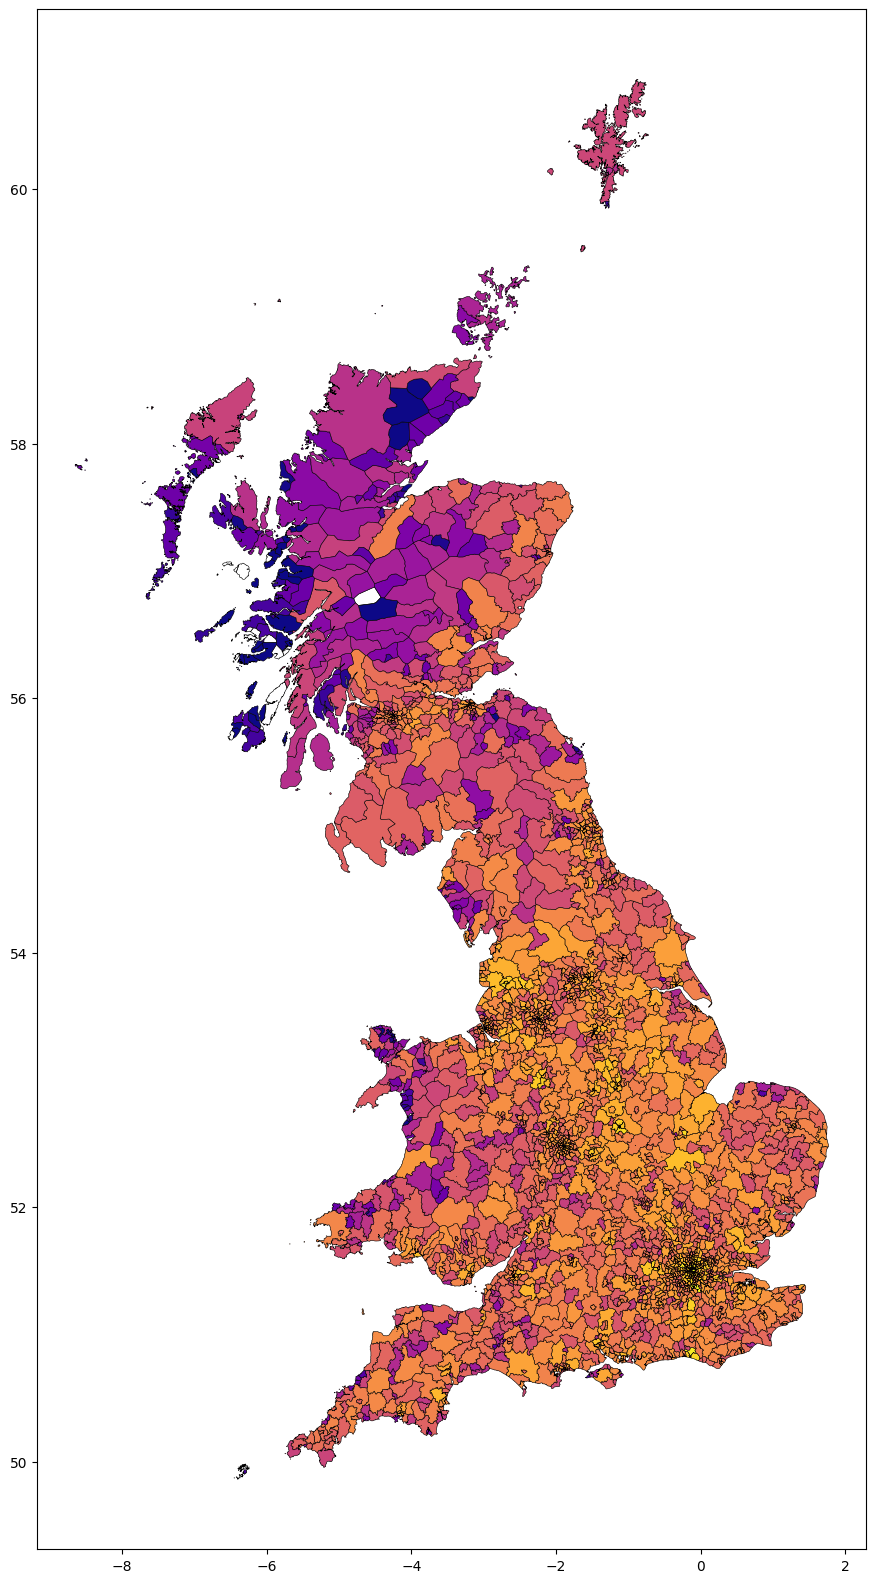

In [80]:
from matplotlib.colors import LogNorm
colormap = plt.cm.plasma
# Apply LogNorm to the colormap normalization
fig, ax = plt.subplots(figsize=(12, 20))
gdf.plot(column='Total_accidents', cmap=colormap, edgecolor='black', linewidth=0.4, ax=ax, norm=LogNorm(vmin=10, vmax=vmax))

sm = matplotlib.cm.ScalarMappable(cmap=colormap, norm=LogNorm(vmin=1, vmax=vmax))
sm.set_array(gdf['Total_accidents'])
fig.colorbar(sm, ax=ax, shrink=0.4)
plt.title('Distribution of Total Accidents over District')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()